## Seen below, the wine dataset was downloaded via the sklearn library. The dataset has 13 features The dependent variable entails 3 classes of wine. The data was standardized using sklearn's standard scaler. Since this is a KNN model, standardization is required. The dataset is split into test and train sets in order to determine the accuracy of the model. The model uses eithher euclidean or minkowski metrics, selects p-values from 1-6, and neighbors(n) 3,5 or 7. The model iterates through each of these parameters, trying all sequences. The scores are calculated using cross validation with accuracy used as the metric for the cross-validation score. The scores are then appended to a dataframe alongside the p,n and metric used for each model.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np


wine = datasets.load_wine()



scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, wine.target, test_size=0.2, random_state=42)

metrics = ['euclidean', 'minkowski']
parameters = range(1, 6)
neighbors = [3,5,7]
results = []

for n in neighbors:
    for metric in metrics:
        for p in parameters:
            knn = KNeighborsClassifier(metric=metric, p=p, weights='distance', n_neighbors=n)
            scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
            mean_score = np.mean(scores)
            result = {'Metric': metric, 'p': p, 'n': n, 'Score': mean_score}
            results.append(result)
df_results = pd.DataFrame(results)


### below we can see the results of the model for the euclidean metric and the various choices for p and n.

In [ ]:
euclidean = df_results[df_results['Metric']=='euclidean']
euclidean

,Metric,p,n,Score
0,euclidean,1,3,0.957635
1,euclidean,2,3,0.957635
2,euclidean,3,3,0.957635
3,euclidean,4,3,0.957635
4,euclidean,5,3,0.957635
10,euclidean,1,5,0.957882
11,euclidean,2,5,0.957882
12,euclidean,3,5,0.957882
13,euclidean,4,5,0.957882
14,euclidean,5,5,0.957882


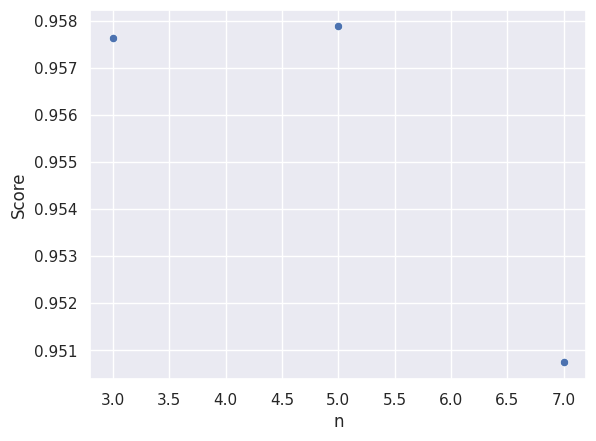

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')


sns.scatterplot(data=euclidean, x='n', y='Score')
plt.show()

## Looking at the above results, a change in p did not effect the accuracy of the model when using the euclidean metric. However, changing N did have an effect. The optimal N in this case was 5, while  n=7 resulted in the lowest accuracy for the model.Now let us look at the minkowski metric model.

In [ ]:
minkowski = df_results[df_results['Metric']=='minkowski']# multiply features by weights
minkowski

,Metric,p,n,Score
5,minkowski,1,3,0.964286
6,minkowski,2,3,0.957635
7,minkowski,3,3,0.950739
8,minkowski,4,3,0.936453
9,minkowski,5,3,0.922414
15,minkowski,1,5,0.978571
16,minkowski,2,5,0.957882
17,minkowski,3,5,0.950739
18,minkowski,4,5,0.943596
19,minkowski,5,5,0.943596


## Changing P had a much larger effect when used in combination with the minkowski metric. A lower p resulted in a model with higher accuracy, while a higher p had a negative effect on the models accuracy. Unlike the euclidean metric model, changing p had an effect on the minkowski model. This can be seen in the scatter plotbelow.

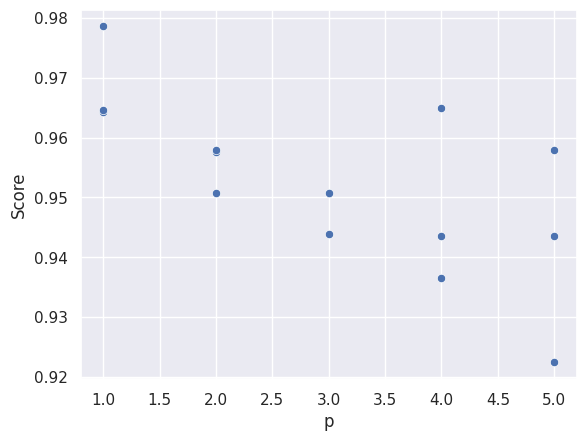

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

sns.scatterplot(data=minkowski, x='p', y='Score')
plt.show()

## In the case of the minkowski model, the optimal number of n was 5, just as it was with the euclidean model. N=7 resulted in slightly more accurate models compared to n=3. The scatterplot below demonstrates the optimal n is 5.

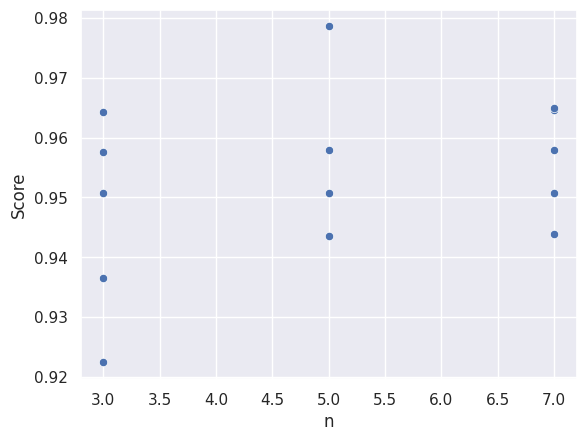

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')


sns.scatterplot(data=minkowski, x='n', y='Score')
plt.show()

# Adding weights to features

## Now let us add weights to a feature to see if we can obtain different results.

In [ ]:
df_results

,Metric,p,n,Score
0,euclidean,1,3,0.957635
1,euclidean,2,3,0.957635
2,euclidean,3,3,0.957635
3,euclidean,4,3,0.957635
4,euclidean,5,3,0.957635
5,minkowski,1,3,0.964286
6,minkowski,2,3,0.957635
7,minkowski,3,3,0.950739
8,minkowski,4,3,0.936453
9,minkowski,5,3,0.922414


In [ ]:
df2 = pd.DataFrame(scaled_data)
df2.columns = wine.feature_names

## below we multiply the alcohol feature by 100

In [ ]:
df2.alcohol = df2.alcohol*100
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,151.861254,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,24.628963,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,19.687903,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,169.154964,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,29.570023,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,87.627476,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,49.334262,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,33.275817,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,20.923168,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2, wine.target, test_size=0.2, random_state=42)

metrics = ['euclidean', 'minkowski']
parameters = range(1, 6)
neighbors = [3,5,7]
results = []

parameters = range(1, 6)
neighbors = [3,5,7]
for n in neighbors:
    for metric in metrics:
        for p in parameters:
            knn = KNeighborsClassifier(metric=metric, p=p, weights='distance', n_neighbors=n)
            scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
            mean_score = np.mean(scores)
            result = {'Metric': metric, 'p': p, 'n': n, 'Score': mean_score}
            results.append(result)
df_results = pd.DataFrame(results)

## Multiplying the alcohol feature by 100 decreased the models accuracy significantly, by about 20%.

In [ ]:
df_results

,Metric,p,n,Score
0,euclidean,1,3,0.733005
1,euclidean,2,3,0.733005
2,euclidean,3,3,0.733005
3,euclidean,4,3,0.733005
4,euclidean,5,3,0.733005
5,minkowski,1,3,0.880296
6,minkowski,2,3,0.733005
7,minkowski,3,3,0.648276
8,minkowski,4,3,0.627094
9,minkowski,5,3,0.620197


In [ ]:
df_results[df_results['Metric']=='minkowski'].Score.mean()

0.7272906403940887

In [ ]:
df_results[df_results['Metric']=='euclidean'].Score.mean()

0.7488505747126435

In [ ]:
euclidean2 = df_results[df_results['Metric']=='euclidean']

In [ ]:
minkowski2 = df_results[df_results['Metric']=='minkowski']

# Changing the p value did not have an effect on the euclidean model with the multiplied alcohol feature. Changing n did have an effect just as it did in the non multiplied feature model. Therefore, the same pattern can be seen as before where a change in p did not have an effect on the model, but changing n did. Just as in the previously non multiplied feature model, the optimal n for the euclidean was 5. This can be seen in the dataframe and scatterplot below.

In [ ]:
euclidean2

,Metric,p,n,Score
0,euclidean,1,3,0.733005
1,euclidean,2,3,0.733005
2,euclidean,3,3,0.733005
3,euclidean,4,3,0.733005
4,euclidean,5,3,0.733005
10,euclidean,1,5,0.760345
11,euclidean,2,5,0.760345
12,euclidean,3,5,0.760345
13,euclidean,4,5,0.760345
14,euclidean,5,5,0.760345


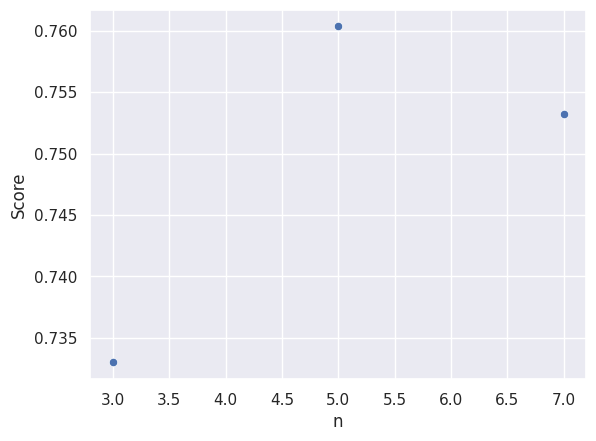

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
#fmri = seaborn.load_dataset("fmri")

sns.scatterplot(data=euclidean2, x='n', y='Score')
plt.show()

## In the case of the minkowski model with the multiplied alcohol feature, the same patterns emerge, albeit with lower accuracy scores. Seen in the dataframe below, changing p as well as n did have an effect on the model, unlike the euclidean model where changing p had no effect. However, in this case the optimal n was 3, instead of 5 as it was in the non multipled alcohol feature model. This can be seen in the dataframe and graph below.

In [ ]:
minkowski2

,Metric,p,n,Score
5,minkowski,1,3,0.880296
6,minkowski,2,3,0.733005
7,minkowski,3,3,0.648276
8,minkowski,4,3,0.627094
9,minkowski,5,3,0.620197
15,minkowski,1,5,0.872906
16,minkowski,2,5,0.760345
17,minkowski,3,5,0.704187
18,minkowski,4,5,0.683251
19,minkowski,5,5,0.669212


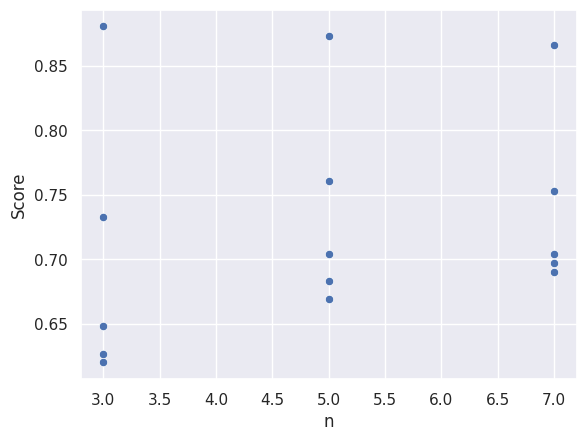

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
#fmri = seaborn.load_dataset("fmri")

sns.scatterplot(data=minkowski2, x='n', y='Score')
plt.show()